#Importing libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/dataset - v2.csv")
df.head()

decision_id     label  default   v1          v2  \
0  94dac214-e5d0-4758-b7ec-5a8e899b7f3e  modeling      0.0  0.0    41247.87   
1  bcab40cd-4aaa-43d2-ae82-7d9ba2ded0a9  modeling      1.0  1.0    10278.99   
2  c2f63ac4-e23c-40e7-8ef1-502c1d27df17  modeling      0.0  6.0  4603616.51   
3  dc8c2882-5868-470c-8669-9a7e87782a40  modeling      0.0  0.0    13656.98   
4  e40e990a-e89c-43c5-b933-f2b096aa1d35  modeling      1.0  7.0  3532898.80   

         v3   v4     v5         v6   v7  ...  v50             brand  carrier  \
0   4526.83  0.0   73.0   15231.14  0.0  ...  0.0              OPPO   Jio 4G   
1  35633.86  0.0   24.0   55549.52  0.0  ...  0.0              OPPO   airtel   
2  46242.48  0.0  354.0  542944.00  0.0  ...  0.0  1cb6aef939f56e90      NaN   
3  15509.49  1.0   33.0        NaN  1.0  ...  0.0                YU   airtel   
4  16363.64  0.0  363.0  542944.00  0.0  ...  0.0   943a681d922e77b      NaN   

                         device_name                  gms_version  \
0                       OPPO CPH1931  21.02.14 (120406-352619232)   
1                       OPPO CPH1931  20.50.16 (120406-351607135)   
2  D8043bd139f034a8 1cb6aef93a8f1e32  20.36.15 (120400-333172415)   
3                             YU5530  20.45.16 (040408-344294571)   
4   638b5f4f86dfed5d 943a681d9bc971d  20.36.15 (100300-333172415)   

       manufacturer  network_type  screen_height  screen_width  screen_dpi  
0              OPPO     Unknown_0         1456.0         720.0       xhdpi  
1              OPPO     Unknown_0         1456.0         720.0       xhdpi  
2  d8043bd139f034a8            4G         1423.0         720.0        hdpi  
3                YU            4G         1776.0        1080.0      xxhdpi  
4  638b5f4f86dfed5d          Wifi         1920.0        1080.0       xhdpi  

[5 rows x 62 columns]

In [ ]:
#Seperating test dataset using label column
train_df = df[df['label'] == 'modeling'].drop(['label','decision_id'],axis=1)
test_df = df[df['label'] == 'oot'].drop(['label','default'],axis=1)

In [ ]:
#Checking skewness in data
print('Skewness: %f' % train_df['default'].skew())

Skewness: 1.317124


#As it is clearly visible the data is highly imbalanced and skewed

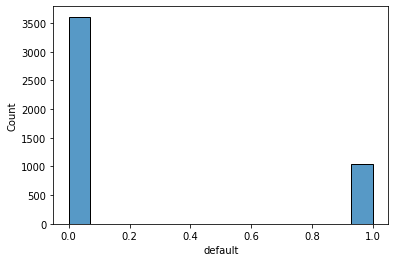

In [ ]:
sns.histplot(train_df['default'])

In [ ]:
train_df.head()

default   v1          v2        v3   v4     v5         v6   v7   v8   v9  \
0      0.0  0.0    41247.87   4526.83  0.0   73.0   15231.14  0.0  0.0  0.0   
1      1.0  1.0    10278.99  35633.86  0.0   24.0   55549.52  0.0  0.0  0.0   
2      0.0  6.0  4603616.51  46242.48  0.0  354.0  542944.00  0.0  0.0  3.0   
3      0.0  0.0    13656.98  15509.49  1.0   33.0        NaN  1.0  0.0  2.0   
4      1.0  7.0  3532898.80  16363.64  0.0  363.0  542944.00  0.0  0.0  3.0   

   ...  v50             brand  carrier                        device_name  \
0  ...  0.0              OPPO   Jio 4G                       OPPO CPH1931   
1  ...  0.0              OPPO   airtel                       OPPO CPH1931   
2  ...  0.0  1cb6aef939f56e90      NaN  D8043bd139f034a8 1cb6aef93a8f1e32   
3  ...  0.0                YU   airtel                             YU5530   
4  ...  0.0   943a681d922e77b      NaN   638b5f4f86dfed5d 943a681d9bc971d   

                   gms_version      manufacturer  network_type  screen_height  \
0  21.02.14 (120406-352619232)              OPPO     Unknown_0         1456.0   
1  20.50.16 (120406-351607135)              OPPO     Unknown_0         1456.0   
2  20.36.15 (120400-333172415)  d8043bd139f034a8            4G         1423.0   
3  20.45.16 (040408-344294571)                YU            4G         1776.0   
4  20.36.15 (100300-333172415)  638b5f4f86dfed5d          Wifi         1920.0   

   screen_width  screen_dpi  
0         720.0       xhdpi  
1         720.0       xhdpi  
2         720.0        hdpi  
3        1080.0      xxhdpi  
4        1080.0       xhdpi  

[5 rows x 60 columns]

#Fixing Nan values

In [ ]:
train_df.shape

(4661, 60)

#Clearly visible that the dataset has Null values

In [ ]:
#To see percentage of missing values
percent_missing = train_df.isnull().sum() * 100 / len(train_df)
missing_value_df = pd.DataFrame({'column_name': train_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
default              default         0.000000
v1                        v1        20.102982
v2                        v2         3.261103
v3                        v3         3.432740
v4                        v4         4.655653
v5                        v5         3.261103
v6                        v6         8.603304
v7                        v7         4.655653
v8                        v8         5.664021
v9                        v9         4.655653
v10                      v10        10.469856
v11                      v11         3.261103
v12                      v12         3.282557
v13                      v13         4.655653
v14                      v14         4.741472
v15                      v15         3.261103
v16                      v16         3.261103
v17                      v17         4.784381
v18                      v18        10.469856
v19                      v19        10.469856
v20                      v20         3.261103
v21                      v21        10.469856
v22                      v22         3.261103
v23                      v23         3.261103
v24                      v24        10.469856
v25                      v25        10.469856
v26                      v26         3.261103
v27                      v27        32.031753
v28                      v28         3.261103
v29                      v29         4.655653
v30                      v30         3.261103
v31                      v31         3.261103
v32                      v32         4.913109
v33                      v33        13.988415
v34                      v34        10.469856
v35                      v35        10.469856
v36                      v36         3.261103
v37                      v37         3.261103
v38                      v38        15.790603
v39                      v39         8.753486
v40                      v40         3.261103
v41                      v41         3.432740
v42                      v42        10.469856
v43                      v43         3.261103
v44                      v44        20.102982
v45                      v45        20.102982
v46                      v46        14.717872
v47                      v47         3.261103
v48                      v48        12.658228
v49                      v49        13.730959
v50                      v50        10.469856
brand                  brand         4.977473
carrier              carrier        11.907316
device_name      device_name         4.977473
gms_version      gms_version         5.041837
manufacturer    manufacturer         4.977473
network_type    network_type         4.977473
screen_height  screen_height         4.977473
screen_width    screen_width         4.977473
screen_dpi        screen_dpi         4.977473

#Dropping columns where the Nan values are greater than 19%.
##The threshold is from data visualization but can be changed if required later.

In [ ]:
col_list=[] #will be used later for test_df
perc = 19.0 #It says the columns where the Nan values are greater than 19% those columns will be dropped.
min_count =  int(((perc)/100)*train_df.shape[0] + 1)
for col in train_df.columns:
  if train_df[col].isnull().sum()<=min_count:
    col_list.append(col)


In [ ]:
perc = 19.0 #It says the columns where the Nan values are greater than 19% those columns will be dropped.
min_count =  int(((100-perc)/100)*train_df.shape[0] + 1)
train_df = train_df.dropna( axis=1, 
                thresh=min_count)

In [ ]:
percent_missing = train_df.isnull().sum() * 100 / len(train_df)
missing_value_df = pd.DataFrame({'column_name': train_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
default              default         0.000000
v2                        v2         3.261103
v3                        v3         3.432740
v4                        v4         4.655653
v5                        v5         3.261103
v6                        v6         8.603304
v7                        v7         4.655653
v8                        v8         5.664021
v9                        v9         4.655653
v10                      v10        10.469856
v11                      v11         3.261103
v12                      v12         3.282557
v13                      v13         4.655653
v14                      v14         4.741472
v15                      v15         3.261103
v16                      v16         3.261103
v17                      v17         4.784381
v18                      v18        10.469856
v19                      v19        10.469856
v20                      v20         3.261103
v21                      v21        10.469856
v22                      v22         3.261103
v23                      v23         3.261103
v24                      v24        10.469856
v25                      v25        10.469856
v26                      v26         3.261103
v28                      v28         3.261103
v29                      v29         4.655653
v30                      v30         3.261103
v31                      v31         3.261103
v32                      v32         4.913109
v33                      v33        13.988415
v34                      v34        10.469856
v35                      v35        10.469856
v36                      v36         3.261103
v37                      v37         3.261103
v38                      v38        15.790603
v39                      v39         8.753486
v40                      v40         3.261103
v41                      v41         3.432740
v42                      v42        10.469856
v43                      v43         3.261103
v46                      v46        14.717872
v47                      v47         3.261103
v48                      v48        12.658228
v49                      v49        13.730959
v50                      v50        10.469856
brand                  brand         4.977473
carrier              carrier        11.907316
device_name      device_name         4.977473
gms_version      gms_version         5.041837
manufacturer    manufacturer         4.977473
network_type    network_type         4.977473
screen_height  screen_height         4.977473
screen_width    screen_width         4.977473
screen_dpi        screen_dpi         4.977473

In [ ]:
train_df.shape

(4661, 56)

In [ ]:
train_df.isna().sum()

default            0
v2               152
v3               160
v4               217
v5               152
v6               401
v7               217
v8               264
v9               217
v10              488
v11              152
v12              153
v13              217
v14              221
v15              152
v16              152
v17              223
v18              488
v19              488
v20              152
v21              488
v22              152
v23              152
v24              488
v25              488
v26              152
v28              152
v29              217
v30              152
v31              152
v32              229
v33              652
v34              488
v35              488
v36              152
v37              152
v38              736
v39              408
v40              152
v41              160
v42              488
v43              152
v46              686
v47              152
v48              590
v49              640
v50              488
brand        

#Using sklearn pipelines for data preprocessing.
Using KNN method to impute missing values, MinMax scaler for data normalisation and mode imputation for categorical columns.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

In [ ]:
numeric_pipeline = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=2)),
    ('scale', MinMaxScaler())
])

In [ ]:
numerical_features = train_df.select_dtypes(include=[np.number])
numerical_features2=numerical_features.drop(['default'],axis=1)

In [ ]:
res=numeric_pipeline.fit_transform(numerical_features2)

In [ ]:
numerical_features = pd.DataFrame(res,columns=numerical_features2.columns)
numerical_features.isna().sum()

v2               0
v3               0
v4               0
v5               0
v6               0
v7               0
v8               0
v9               0
v10              0
v11              0
v12              0
v13              0
v14              0
v15              0
v16              0
v17              0
v18              0
v19              0
v20              0
v21              0
v22              0
v23              0
v24              0
v25              0
v26              0
v28              0
v29              0
v30              0
v31              0
v32              0
v33              0
v34              0
v35              0
v36              0
v37              0
v38              0
v39              0
v40              0
v41              0
v42              0
v43              0
v46              0
v47              0
v48              0
v49              0
v50              0
screen_height    0
screen_width     0
dtype: int64

In [ ]:
numerical_features['default']=train_df['default']

In [ ]:
numerical_features.head()

v2        v3        v4        v5        v6        v7        v8  \
0  0.001278  0.001452  0.000000  0.091593  0.000297  0.000000  0.050892   
1  0.000318  0.011430  0.000000  0.030113  0.001084  0.000000  0.050892   
2  0.142594  0.014833  0.000000  0.444166  0.010591  0.000000  0.050892   
3  0.000423  0.004975  0.142857  0.041405  0.000432  0.142857  0.050892   
4  0.109429  0.005249  0.000000  0.455458  0.010591  0.000000  0.050892   

         v9       v10       v11  ...  v42       v43       v46  v47       v48  \
0  0.000000  0.008620  0.005647  ...  0.0  0.001018  0.004002  0.0  0.002409   
1  0.000000  0.008620  0.002320  ...  0.0  0.000276  0.004002  0.0  0.000078   
2  0.061224  0.008620  0.744636  ...  0.0  0.105395  0.004002  0.0  0.006863   
3  0.040816  0.009913  0.001153  ...  0.0  0.000299  0.004002  0.0  0.000676   
4  0.061224  0.009913  0.499173  ...  0.0  0.174208  0.004002  0.0  0.006757   

   v49  v50  screen_height  screen_width  default  
0  0.0  0.0       0.306667      0.140928      0.0  
1  0.0  0.0       0.306667      0.140928      1.0  
2  0.0  0.0       0.292917      0.140928      0.0  
3  0.0  0.0       0.440000      0.352319      0.0  
4  0.0  0.0       0.500000      0.352319      1.0  

[5 rows x 49 columns]

In [ ]:
categorial_features = train_df.select_dtypes(include=[np.object])
categorial_features.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


brand           232
carrier         555
device_name     232
gms_version     235
manufacturer    232
network_type    232
screen_dpi      232
dtype: int64

In [ ]:
categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),  #can be customised to add more processing steps which are done seperately as of now, like one hot encoding.
])

In [ ]:
res=categorical_pipeline.fit_transform(categorial_features)

In [ ]:
categorial_features = pd.DataFrame(res,columns=categorial_features.columns)
categorial_features.isna().sum()

brand           0
carrier         0
device_name     0
gms_version     0
manufacturer    0
network_type    0
screen_dpi      0
dtype: int64

In [ ]:
categorial_features.head()

brand carrier                        device_name  \
0              OPPO  Jio 4G                       OPPO CPH1931   
1              OPPO  airtel                       OPPO CPH1931   
2  1cb6aef939f56e90  Jio 4G  D8043bd139f034a8 1cb6aef93a8f1e32   
3                YU  airtel                             YU5530   
4   943a681d922e77b  Jio 4G   638b5f4f86dfed5d 943a681d9bc971d   

                   gms_version      manufacturer network_type screen_dpi  
0  21.02.14 (120406-352619232)              OPPO    Unknown_0      xhdpi  
1  20.50.16 (120406-351607135)              OPPO    Unknown_0      xhdpi  
2  20.36.15 (120400-333172415)  d8043bd139f034a8           4G       hdpi  
3  20.45.16 (040408-344294571)                YU           4G     xxhdpi  
4  20.36.15 (100300-333172415)  638b5f4f86dfed5d         Wifi      xhdpi

#Dataframe after handling null values 

In [ ]:
train_df=pd.concat([numerical_features,categorial_features],axis=1)
train_df

v2            v3        v4        v5            v6        v7  \
0     1.277623e-03  1.452050e-03  0.000000  0.091593  2.970674e-04  0.000000   
1     3.183844e-04  1.143011e-02  0.000000  0.030113  1.083538e-03  0.000000   
2     1.425937e-01  1.483298e-02  0.000000  0.444166  1.059090e-02  0.000000   
3     4.230152e-04  4.974906e-03  0.142857  0.041405  4.322741e-04  0.142857   
4     1.094290e-01  5.248888e-03  0.000000  0.455458  1.059090e-02  0.000000   
5     6.252419e-03  9.480539e-04  0.000000  0.141782  1.790767e-03  0.000000   
6     2.997760e-04  7.127405e-05  0.000000  0.027604  1.292039e-04  0.000000   
7     4.976862e-04  1.162065e-03  0.000000  0.069009  1.903836e-04  0.000000   
8     3.004500e-03  1.915251e-03  0.000000  0.104141  8.540013e-04  0.000000   
9     6.710805e-03  1.327551e-03  0.000000  0.204517  2.129402e-03  0.000000   
10    7.761351e-04  6.081550e-04  0.000000  0.185696  2.899838e-04  0.000000   
11    1.087569e-01  5.371536e-03  0.000000  0.461731  1.059090e-02  0.000000   
12    4.878516e-04  7.500752e-02  0.000000  0.041405  5.402386e-03  0.142857   
13    5.960299e-04  1.682967e-02  0.000000  0.048934  1.913340e-03  0.071429   
14    2.251763e-04  3.093643e-03  0.000000  0.082811  9.587450e-05  0.000000   
15    2.633807e-02  7.445604e-05  0.000000  0.332497  1.664413e-03  0.000000   
16    2.336996e-03  1.953557e-03  0.000000  0.096612  8.058632e-04  0.000000   
17    8.218005e-05  1.685163e-03  0.000000  0.008783  1.684426e-04  0.142857   
18    1.152892e-03  2.772682e-03  0.000000  0.048934  6.059187e-04  0.000000   
19    2.444398e-05  0.000000e+00  0.000000  0.000000  0.000000e+00  0.000000   
20    3.327794e-04  8.050093e-03  0.000000  0.002509  1.152463e-03  0.000000   
21    8.126523e-04  3.292371e-02  0.000000  0.033877  3.550868e-03  0.142857   
22    1.087499e-03  1.593334e-03  0.000000  0.091593  3.966099e-04  0.000000   
23    4.088950e-03  1.617277e-02  0.000000  0.082811  6.341742e-03  0.000000   
24    2.409787e-04  3.420728e-03  0.000000  0.043915  3.319901e-04  0.000000   
25    1.574641e-03  4.004883e-04  0.000000  0.169385  3.339503e-04  0.000000   
26    1.540047e-01  1.429643e-01  0.000000  0.007528  1.909773e-01  0.000000   
27    3.958409e-03  5.386868e-04  0.000000  0.215809  1.853558e-03  0.142857   
28    1.233565e-03  6.554358e-04  0.000000  0.035132  9.668402e-04  0.000000   
29    5.336610e-04  3.998917e-04  0.285714  0.272271  6.070426e-05  0.142857   
30    1.199613e-03  3.634431e-04  0.142857  0.143036  7.712875e-04  0.000000   
31    3.607661e-03  1.221615e-02  0.000000  0.101631  5.466700e-04  0.142857   
32    4.872934e-03  1.198379e-05  0.000000  0.100376  2.602058e-03  0.000000   
33    1.829704e-04  1.566380e-03  0.000000  0.012547  9.939914e-05  0.000000   
34    1.156507e-03  1.265612e-04  0.000000  0.288582  7.025660e-04  0.000000   
35    3.844615e-04  1.622623e-03  0.000000  0.042660  3.559938e-05  0.000000   
36    5.368643e-04  1.302882e-02  0.000000  0.070263  1.182964e-03  0.142857   
37    1.250636e-02  3.597825e-03  0.000000  0.407779  1.464079e-03  0.000000   
38    2.541726e-03  7.283483e-03  0.000000  0.214555  1.504986e-03  0.000000   
39    1.423369e-03  1.394688e-05  0.000000  0.097867  3.560598e-04  0.000000   
40    8.068183e-06  1.282451e-02  0.428571  0.020075  5.960893e-04  0.000000   
41    5.556761e-04  3.628717e-03  0.000000  0.053952  3.334308e-04  0.000000   
42    6.917895e-02  1.033529e-02  0.000000  0.179423  5.779035e-03  0.000000   
43    2.972708e-02  7.970889e-04  0.000000  0.427854  1.702100e-03  0.000000   
44    3.057199e-04  2.028901e-02  0.142857  0.101631  2.362239e-04  0.000000   
45    7.235619e-04  4.411694e-03  0.285714  0.074028  1.472273e-03  0.000000   
46    4.507490e-03  1.056678e-03  0.000000  0.215809  1.882408e-03  0.142857   
47    1.931684e-04  5.099046e-04  0.000000  0.057716  2.398172e-04  0.285714   
48    1.069655e-02  8.833674e-02  0.000000  0.145546  9.000892e-03  0.285714   
49    2.488378e-

#Heatmap showing corelation among numerical features

In [ ]:
#Visualizing brands column
brands=train_df['brand'].value_counts()

In [ ]:
brands.to_csv('brand.csv')

In [ ]:
brands_df=pd.read_csv('/content/brand.csv')
pd.set_option("display.max_rows", None)
brands_df.columns=['brands','counts']
brands_df.head(10)

brands  counts
0             vivo    1306
1          samsung     879
2             OPPO     654
3           xiaomi     528
4           realme     244
5           Xiaomi     173
6            Redmi     157
7  943a681d922e77b     100
8          OnePlus      98
9            HONOR      74

In [ ]:
X_train = train_df.drop(['default'], axis = 1)
y_train = train_df['default']

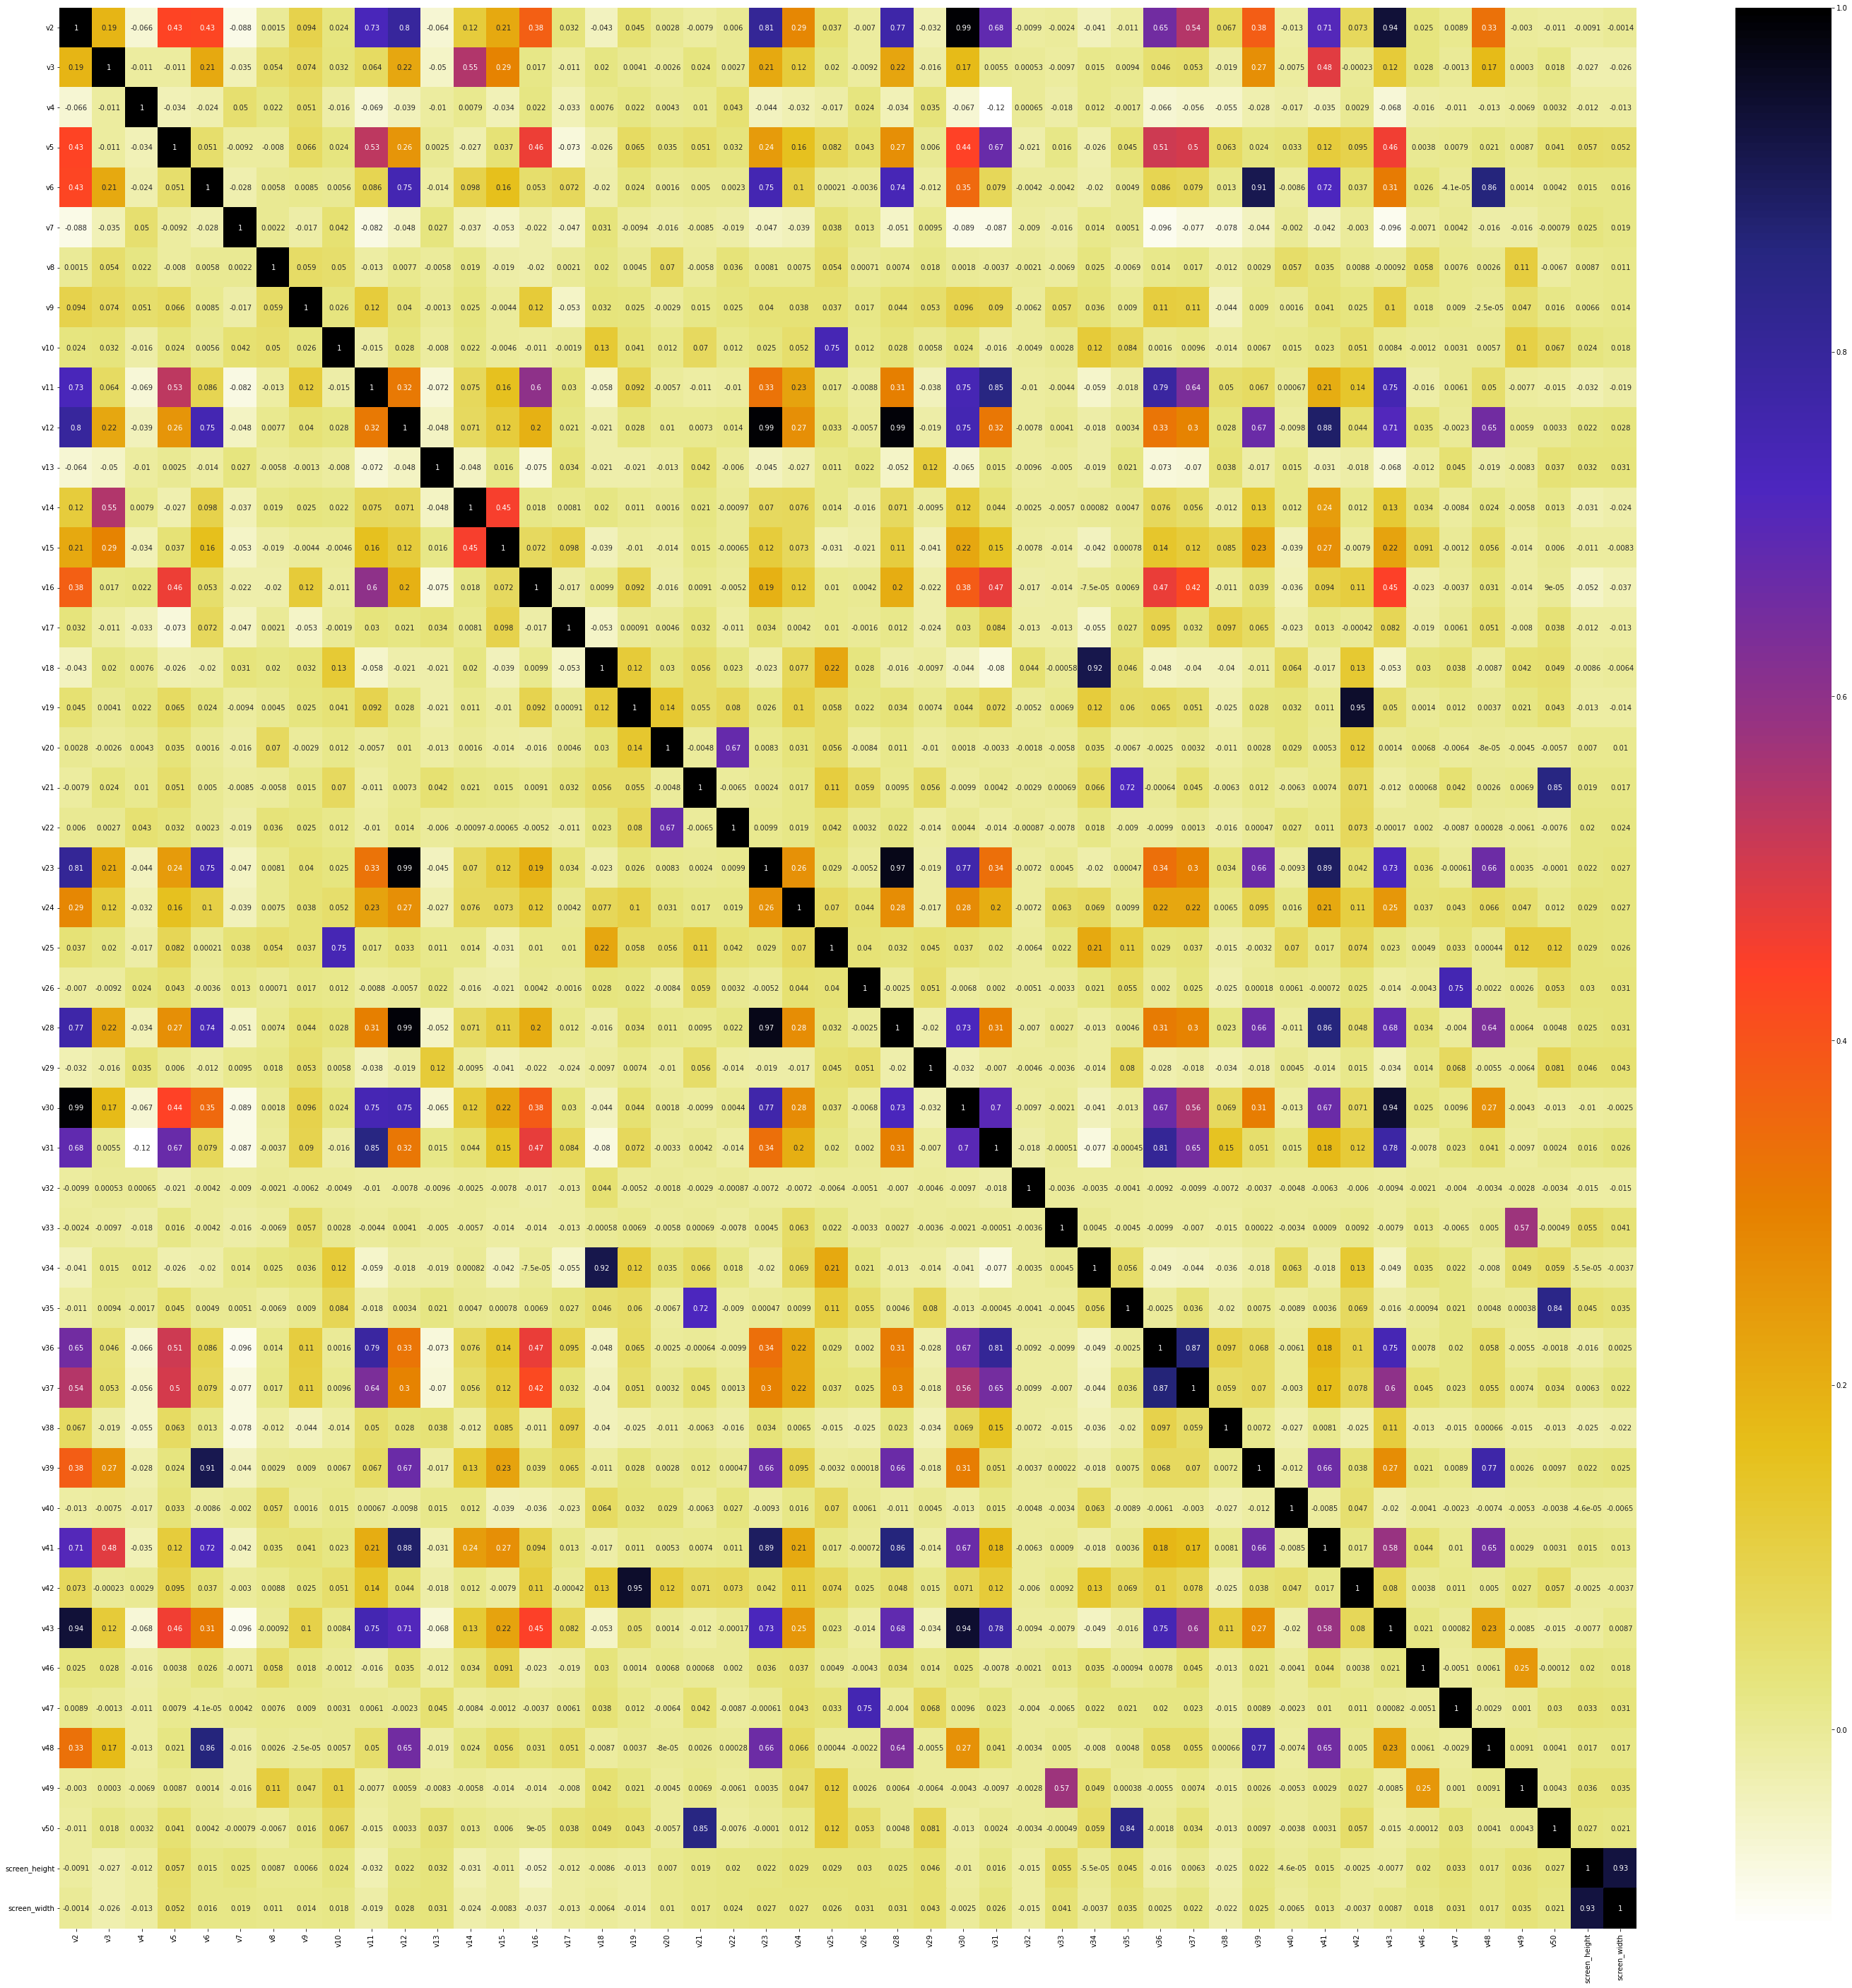

In [ ]:
cor = X_train.corr()
plt.figure(figsize=(50,50))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

#Dropping corelated features which are more than 85% correlated

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr   

In [ ]:
corr_features = correlation(X_train, 0.85)
corr_features

{'screen_width',
 'v23',
 'v28',
 'v30',
 'v31',
 'v34',
 'v37',
 'v39',
 'v41',
 'v42',
 'v43',
 'v48',
 'v50'}

In [ ]:
train_df=train_df.drop(corr_features,axis=1) ##dropping correlated features

In [ ]:
train_df.head()

v2        v3        v4        v5        v6        v7        v8  \
0  0.001278  0.001452  0.000000  0.091593  0.000297  0.000000  0.050892   
1  0.000318  0.011430  0.000000  0.030113  0.001084  0.000000  0.050892   
2  0.142594  0.014833  0.000000  0.444166  0.010591  0.000000  0.050892   
3  0.000423  0.004975  0.142857  0.041405  0.000432  0.142857  0.050892   
4  0.109429  0.005249  0.000000  0.455458  0.010591  0.000000  0.050892   

         v9       v10       v11  ...  v49  screen_height  default  \
0  0.000000  0.008620  0.005647  ...  0.0       0.306667      0.0   
1  0.000000  0.008620  0.002320  ...  0.0       0.306667      1.0   
2  0.061224  0.008620  0.744636  ...  0.0       0.292917      0.0   
3  0.040816  0.009913  0.001153  ...  0.0       0.440000      0.0   
4  0.061224  0.009913  0.499173  ...  0.0       0.500000      1.0   

              brand  carrier                        device_name  \
0              OPPO   Jio 4G                       OPPO CPH1931   
1              OPPO   airtel                       OPPO CPH1931   
2  1cb6aef939f56e90   Jio 4G  D8043bd139f034a8 1cb6aef93a8f1e32   
3                YU   airtel                             YU5530   
4   943a681d922e77b   Jio 4G   638b5f4f86dfed5d 943a681d9bc971d   

                   gms_version      manufacturer  network_type  screen_dpi  
0  21.02.14 (120406-352619232)              OPPO     Unknown_0       xhdpi  
1  20.50.16 (120406-351607135)              OPPO     Unknown_0       xhdpi  
2  20.36.15 (120400-333172415)  d8043bd139f034a8            4G        hdpi  
3  20.45.16 (040408-344294571)                YU            4G      xxhdpi  
4  20.36.15 (100300-333172415)  638b5f4f86dfed5d          Wifi       xhdpi  

[5 rows x 43 columns]

#Inferential Statistics

In [ ]:
train_df[['brand','device_name','manufacturer']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

brand  device_name  manufacturer
brand         1.000000     0.499893      0.961897
device_name   0.499893     1.000000      0.486098
manufacturer  0.961897     0.486098      1.000000

#Dropping manufaturer feature as it is highly corelated with brand

In [ ]:
train_df=train_df.drop(['manufacturer'],axis=1)

#Dropping nothing from here as there is no correlation among these features

In [ ]:
train_df[['network_type','screen_height','screen_dpi','gms_version','carrier']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

network_type  screen_height  screen_dpi  gms_version   carrier
network_type       1.000000      -0.031172   -0.071072     0.106538  0.048740
screen_height     -0.031172       1.000000    0.021478    -0.045149 -0.036507
screen_dpi        -0.071072       0.021478    1.000000     0.031991 -0.015747
gms_version        0.106538      -0.045149    0.031991     1.000000  0.086826
carrier            0.048740      -0.036507   -0.015747     0.086826  1.000000

#Running Hypothesis and ChiSquare tests on categorical variables

In [ ]:
# Cross tabulation between brand and default
CrosstabResult=pd.crosstab(index=train_df['brand'],columns=train_df['default'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
#Assumption(H0): The two columns are NOT related to each other
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 2.7695313149040557e-36


In [ ]:
# Cross tabulation between carrier and default
CrosstabResult=pd.crosstab(index=train_df['carrier'],columns=train_df['default'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
#Assumption(H0): The two columns are NOT related to each other
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.4384389966570654e-07


In [ ]:
# Cross tabulation between gms_version and default
CrosstabResult=pd.crosstab(index=train_df['gms_version'],columns=train_df['default'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
#Assumption(H0): The two columns are NOT related to each other
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 2.0857371915326974e-60


In [ ]:
# Cross tabulation between network_type and default
CrosstabResult=pd.crosstab(index=train_df['network_type'],columns=train_df['default'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
#Assumption(H0): The two columns are NOT related to each other
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 8.410598675802043e-19


In [ ]:
# Cross tabulation between screen_height and default
CrosstabResult=pd.crosstab(index=train_df['screen_height'],columns=train_df['default'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
#Assumption(H0): The two columns are NOT related to each other
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 6.981637302247969e-18


In [ ]:
# Cross tabulation between screen_dpi and default
CrosstabResult=pd.crosstab(index=train_df['screen_dpi'],columns=train_df['default'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
#Assumption(H0): The two columns are NOT related to each other
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.000669229021045005


In [ ]:
# Cross tabulation between device_name and default
CrosstabResult=pd.crosstab(index=train_df['device_name'],columns=train_df['default'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
#Assumption(H0): The two columns are NOT related to each other
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.715412031367993e-21


#All p values are below 0.05 , hence all features have corelation with target and hence not dropping any feature column.

In [ ]:
train_df.head()

v2        v3        v4        v5        v6        v7        v8  \
0  0.001278  0.001452  0.000000  0.091593  0.000297  0.000000  0.050892   
1  0.000318  0.011430  0.000000  0.030113  0.001084  0.000000  0.050892   
2  0.142594  0.014833  0.000000  0.444166  0.010591  0.000000  0.050892   
3  0.000423  0.004975  0.142857  0.041405  0.000432  0.142857  0.050892   
4  0.109429  0.005249  0.000000  0.455458  0.010591  0.000000  0.050892   

         v9       v10       v11  ...  v47  v49  screen_height  default  \
0  0.000000  0.008620  0.005647  ...  0.0  0.0       0.306667      0.0   
1  0.000000  0.008620  0.002320  ...  0.0  0.0       0.306667      1.0   
2  0.061224  0.008620  0.744636  ...  0.0  0.0       0.292917      0.0   
3  0.040816  0.009913  0.001153  ...  0.0  0.0       0.440000      0.0   
4  0.061224  0.009913  0.499173  ...  0.0  0.0       0.500000      1.0   

              brand  carrier                        device_name  \
0              OPPO   Jio 4G                       OPPO CPH1931   
1              OPPO   airtel                       OPPO CPH1931   
2  1cb6aef939f56e90   Jio 4G  D8043bd139f034a8 1cb6aef93a8f1e32   
3                YU   airtel                             YU5530   
4   943a681d922e77b   Jio 4G   638b5f4f86dfed5d 943a681d9bc971d   

                   gms_version  network_type  screen_dpi  
0  21.02.14 (120406-352619232)     Unknown_0       xhdpi  
1  20.50.16 (120406-351607135)     Unknown_0       xhdpi  
2  20.36.15 (120400-333172415)            4G        hdpi  
3  20.45.16 (040408-344294571)            4G      xxhdpi  
4  20.36.15 (100300-333172415)          Wifi       xhdpi  

[5 rows x 42 columns]

#Checking mutual information in numerical features.
##Planning to use later to drop least important features

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
y=numerical_features['default']
numerical_features=numerical_features.drop(['default'],axis=1)
mutual_info = mutual_info_classif(numerical_features,y)
sorted(list(mutual_info))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0015221495919006678,
 0.0016800974159918436,
 0.0017014473685221798,
 0.0026206780896305126,
 0.0030188640693233904,
 0.0034503036524198283,
 0.003594192882161007,
 0.004032415933222122,
 0.004856814295747469,
 0.0048740876269006694,
 0.009337318281678053,
 0.009450208343509292,
 0.010328161682743087,
 0.010594602616475157,
 0.013327187258540985,
 0.014256446649155485,
 0.015577850330283027,
 0.01586575329987272,
 0.016373985707230476,
 0.02000418384536129,
 0.023291031154240027,
 0.023386050126223523,
 0.023505834574230056,
 0.028403048604439984,
 0.03431147757905095,
 0.03482896922243617,
 0.03567119167255828,
 0.037821924919138716,
 0.03796938162819563,
 0.04036534510248457,
 0.04051885376287312,
 0.04268286938058008,
 0.04279640155490272,
 0.0442628637531961,
 0.04745495085190843,
 0.05187404512924498,
 0.051986330368313904,
 0.05370784269162732,
 0.05424704252719037,
 0.05452050498952432,
 0.05538003633895583]

In [ ]:
#Bring back target column
numerical_features['default']=train_df['default']

#It is shown in below cells that there is very high cardinality in categorical features (i.e in a column there are many unique classes)
#Clubbing all those types to rare category with 2%threshold  
###If data in a column for particular class is less than 2%, grouping those rows to category Rare.

In [ ]:
categorial_features['gms_version'].value_counts()

20.50.16 (120400-351607135)    634
20.50.16 (120408-351607135)    268
20.50.16 (040406-351607135)    203
20.47.14 (120400-349456378)    152
20.47.14 (120408-349456378)    135
20.50.16 (120406-351607135)    130
20.50.16 (100406-351607135)    124
20.47.14 (040406-349456378)    109
20.36.15 (120408-333172415)     99
20.50.16 (100408-351607135)     98
20.50.16 (100400-351607135)     89
20.45.16 (120400-344294571)     70
20.36.15 (040406-333172415)     67
20.36.15 (120400-333172415)     64
20.36.15 (100406-333172415)     61
20.47.14 (100406-349456378)     59
20.36.15 (100300-333172415)     54
20.45.16 (040406-344294571)     54
20.47.14 (100400-349456378)     51
20.45.16 (120408-344294571)     51
20.45.16 (100406-344294571)     48
20.47.14 (100408-349456378)     47
20.50.16 (040408-351607135)     47
20.47.14 (120406-349456378)     47
20.33.15 (040406-330018294)     46
20.39.15 (040406-335085812)     45
20.50.16 (100306-351607135)     39
20.39.15 (120400-335085812)     36
20.50.16 (040306-351

In [ ]:
categorial_features['screen_dpi'].value_counts()

xhdpi      3110
xxhdpi     1203
hdpi        343
xxxhdpi       3
mdpi          2
Name: screen_dpi, dtype: int64

#Dealing with high cardinality in data.  
##First step is to groupy the categories in a column which belongs to same class. For example Vi India and Vodafone IN are same in carrier class.
##Then replace all the rare categories with one label, say "Rare" and remove later if this doesn't add value to prediction.

In [ ]:
#Dropping brand feature because device_name covers up brand information as well (Shown by correlation as well)
#Can also keep brand feature and proceed, for now just dropped it.
train_df=train_df.drop(['brand'],axis=1)

In [ ]:
#Here more grouping can be done but as of now just tried on carrier on few categories.
#If brands is not dropped then grouping can be applied on brands as well. As of now I have dropped brand column.
train_df['carrier'] = train_df['carrier'].replace({
                                                  'Vi India':'Vi India',
                                                  'Vodafone IN':'Vi India',
                                                  'airtel':'airtel',
                                                  'IND airtel':'airtel'
                                                  })

In [ ]:
train_df.head()

v2        v3        v4        v5        v6        v7        v8  \
0  0.001278  0.001452  0.000000  0.091593  0.000297  0.000000  0.050892   
1  0.000318  0.011430  0.000000  0.030113  0.001084  0.000000  0.050892   
2  0.142594  0.014833  0.000000  0.444166  0.010591  0.000000  0.050892   
3  0.000423  0.004975  0.142857  0.041405  0.000432  0.142857  0.050892   
4  0.109429  0.005249  0.000000  0.455458  0.010591  0.000000  0.050892   

         v9       v10       v11  ...       v46  v47  v49  screen_height  \
0  0.000000  0.008620  0.005647  ...  0.004002  0.0  0.0       0.306667   
1  0.000000  0.008620  0.002320  ...  0.004002  0.0  0.0       0.306667   
2  0.061224  0.008620  0.744636  ...  0.004002  0.0  0.0       0.292917   
3  0.040816  0.009913  0.001153  ...  0.004002  0.0  0.0       0.440000   
4  0.061224  0.009913  0.499173  ...  0.004002  0.0  0.0       0.500000   

   default  carrier                        device_name  \
0      0.0   Jio 4G                       OPPO CPH1931   
1      1.0   airtel                       OPPO CPH1931   
2      0.0   Jio 4G  D8043bd139f034a8 1cb6aef93a8f1e32   
3      0.0   airtel                             YU5530   
4      1.0   Jio 4G   638b5f4f86dfed5d 943a681d9bc971d   

                   gms_version  network_type  screen_dpi  
0  21.02.14 (120406-352619232)     Unknown_0       xhdpi  
1  20.50.16 (120406-351607135)     Unknown_0       xhdpi  
2  20.36.15 (120400-333172415)            4G        hdpi  
3  20.45.16 (040408-344294571)            4G      xxhdpi  
4  20.36.15 (100300-333172415)          Wifi       xhdpi  

[5 rows x 41 columns]

In [ ]:
#Grouping in execution
def get_freq_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)[var].count() / len(df)
    return tmp[tmp > rare_perc].index

vars_cat = [val for val in train_df.columns if train_df[val].dtype=='O']
for var in vars_cat:
    # find the frequent categories
    frequent_cat = get_freq_labels(train_df, var, 0.02) #2% threshold
    # replace rare categories by the string "Rare"
    train_df[var] = np.where(train_df[var].isin(frequent_cat ), train_df[var], 'Rare')

In [ ]:
train_df.head()

v2        v3        v4        v5        v6        v7        v8  \
0  0.001278  0.001452  0.000000  0.091593  0.000297  0.000000  0.050892   
1  0.000318  0.011430  0.000000  0.030113  0.001084  0.000000  0.050892   
2  0.142594  0.014833  0.000000  0.444166  0.010591  0.000000  0.050892   
3  0.000423  0.004975  0.142857  0.041405  0.000432  0.142857  0.050892   
4  0.109429  0.005249  0.000000  0.455458  0.010591  0.000000  0.050892   

         v9       v10       v11  ...       v46  v47  v49  screen_height  \
0  0.000000  0.008620  0.005647  ...  0.004002  0.0  0.0       0.306667   
1  0.000000  0.008620  0.002320  ...  0.004002  0.0  0.0       0.306667   
2  0.061224  0.008620  0.744636  ...  0.004002  0.0  0.0       0.292917   
3  0.040816  0.009913  0.001153  ...  0.004002  0.0  0.0       0.440000   
4  0.061224  0.009913  0.499173  ...  0.004002  0.0  0.0       0.500000   

   default  carrier                       device_name  \
0      0.0   Jio 4G                              Rare   
1      1.0   airtel                              Rare   
2      0.0   Jio 4G                              Rare   
3      0.0   airtel                              Rare   
4      1.0   Jio 4G  638b5f4f86dfed5d 943a681d9bc971d   

                   gms_version  network_type  screen_dpi  
0                         Rare     Unknown_0       xhdpi  
1  20.50.16 (120406-351607135)     Unknown_0       xhdpi  
2                         Rare            4G        hdpi  
3                         Rare            4G      xxhdpi  
4                         Rare          Wifi       xhdpi  

[5 rows x 41 columns]

#Checking results of reducing cardialinity operation

In [ ]:
categorial_features = train_df.select_dtypes(include=[np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


#**Info about device_name and brand column**  
##device_name features narrows down to just two classes after cardinality operation with threshold of 2% due to which mostly all device Id's have been grouped as Rare class.  
##Threshold can be reduced in order to have more device_id in dataset.  
##Brand column can be retained in order to have brand related data as well because brands is a subset of device_name.  
##But as of now i have dropped brand column but it can be retained to getter a better dataset - Future scope

#Below cell shows the results after grouping rare rows to a single type - rare

In [ ]:
for i in categorial_features:
  print(categorial_features[i].value_counts(),end="\n")
  print("*********************************************")

Jio 4G      2154
airtel      1385
Rare         510
Vi India     448
Idea         164
Name: carrier, dtype: int64
*********************************************
Rare                                4329
638b5f4f86dfed5d 943a681d9bc971d     332
Name: device_name, dtype: int64
*********************************************
Rare                           2709
20.50.16 (120400-351607135)     634
20.50.16 (120408-351607135)     268
20.50.16 (040406-351607135)     203
20.47.14 (120400-349456378)     152
20.47.14 (120408-349456378)     135
20.50.16 (120406-351607135)     130
20.50.16 (100406-351607135)     124
20.47.14 (040406-349456378)     109
20.36.15 (120408-333172415)      99
20.50.16 (100408-351607135)      98
Name: gms_version, dtype: int64
*********************************************
4G           2319
Unknown_0    1439
Wifi          659
Unknown       207
Rare           37
Name: network_type, dtype: int64
*********************************************
xhdpi     3110
xxhdpi    1203
hdpi    

In [ ]:
train_df.head(10)

v2        v3        v4        v5        v6        v7        v8  \
0  0.001278  0.001452  0.000000  0.091593  0.000297  0.000000  0.050892   
1  0.000318  0.011430  0.000000  0.030113  0.001084  0.000000  0.050892   
2  0.142594  0.014833  0.000000  0.444166  0.010591  0.000000  0.050892   
3  0.000423  0.004975  0.142857  0.041405  0.000432  0.142857  0.050892   
4  0.109429  0.005249  0.000000  0.455458  0.010591  0.000000  0.050892   
5  0.006252  0.000948  0.000000  0.141782  0.001791  0.000000  0.050892   
6  0.000300  0.000071  0.000000  0.027604  0.000129  0.000000  0.050892   
7  0.000498  0.001162  0.000000  0.069009  0.000190  0.000000  0.050892   
8  0.003005  0.001915  0.000000  0.104141  0.000854  0.000000  0.050892   
9  0.006711  0.001328  0.000000  0.204517  0.002129  0.000000  0.050892   

         v9       v10       v11  ...       v46  v47  v49  screen_height  \
0  0.000000  0.008620  0.005647  ...  0.004002  0.0  0.0       0.306667   
1  0.000000  0.008620  0.002320  ...  0.004002  0.0  0.0       0.306667   
2  0.061224  0.008620  0.744636  ...  0.004002  0.0  0.0       0.292917   
3  0.040816  0.009913  0.001153  ...  0.004002  0.0  0.0       0.440000   
4  0.061224  0.009913  0.499173  ...  0.004002  0.0  0.0       0.500000   
5  0.040816  0.008620  0.015296  ...  0.004002  0.0  0.0       0.281667   
6  0.020408  0.008620  0.007366  ...  0.004002  0.0  0.0       0.306667   
7  0.040816  0.008620  0.004189  ...  0.004002  0.0  0.0       0.588333   
8  0.020408  0.008620  0.000000  ...  0.004002  0.0  0.0       0.610000   
9  0.000000  0.008620  0.002542  ...  0.004002  0.0  0.0       0.559167   

   default  carrier                       device_name  \
0      0.0   Jio 4G                              Rare   
1      1.0   airtel                              Rare   
2      0.0   Jio 4G                              Rare   
3      0.0   airtel                              Rare   
4      1.0   Jio 4G  638b5f4f86dfed5d 943a681d9bc971d   
5      0.0   Jio 4G                              Rare   
6      0.0   Jio 4G                              Rare   
7      0.0   Jio 4G                              Rare   
8      1.0   Jio 4G                              Rare   
9      1.0   Jio 4G                              Rare   

                   gms_version  network_type  screen_dpi  
0                         Rare     Unknown_0       xhdpi  
1  20.50.16 (120406-351607135)     Unknown_0       xhdpi  
2                         Rare            4G        hdpi  
3                         Rare            4G      xxhdpi  
4                         Rare          Wifi       xhdpi  
5                         Rare     Unknown_0        hdpi  
6  20.50.16 (120406-351607135)     Unknown_0       xhdpi  
7  20.50.16 (120408-351607135)     Unknown_0      xxhdpi  
8  20.50.16 (120408-351607135)     Unknown_0      xxhdpi  
9                         Rare            4G       xhdpi  

[10 rows x 41 columns]

#Visualizing categorical columns

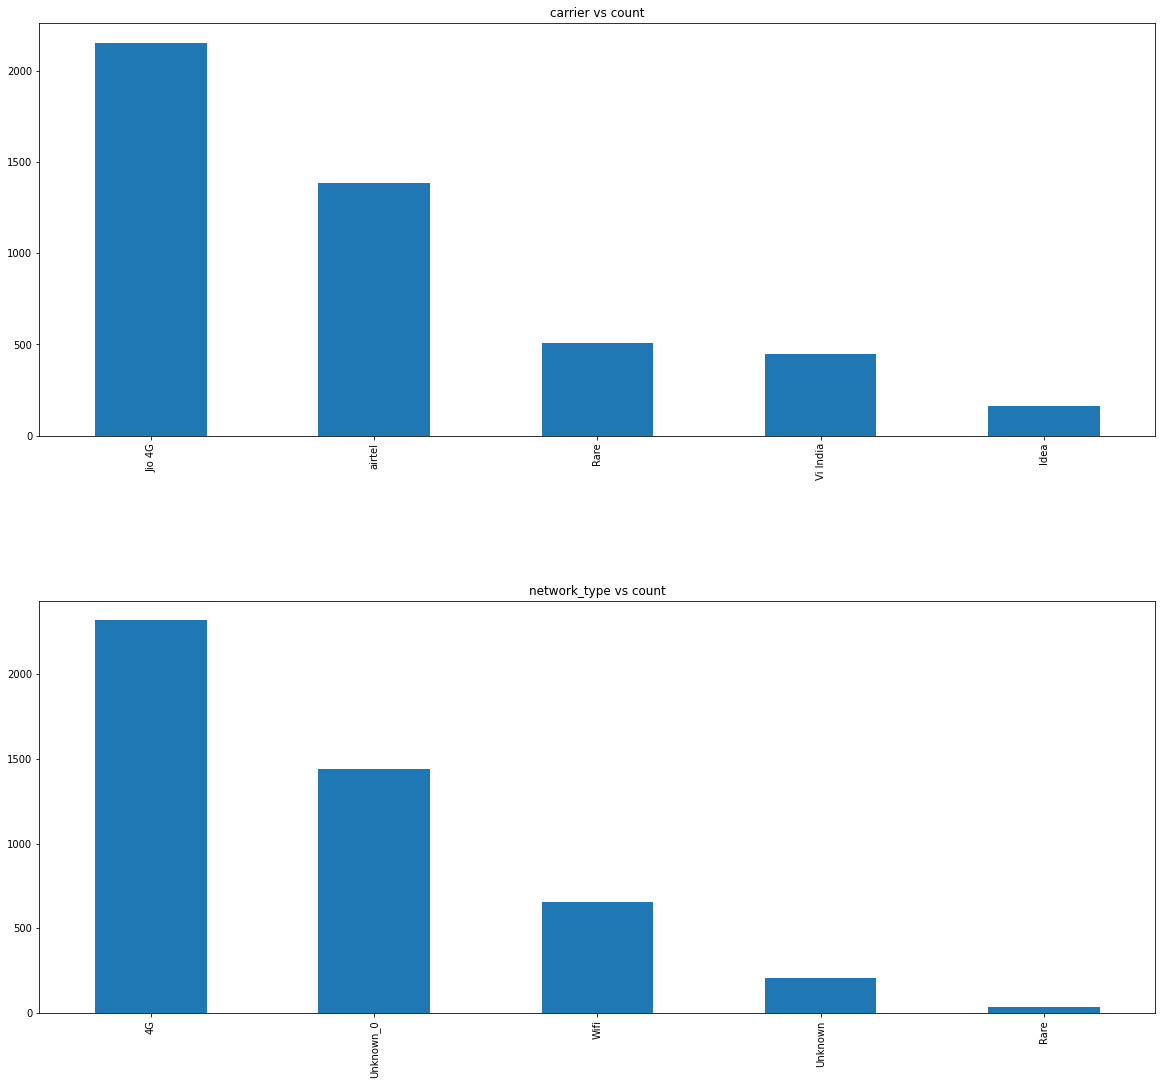

In [ ]:
plt.figure(figsize = (20,10))

plt.subplot(211)
train_df['carrier'].value_counts().plot(kind='bar').set_title('carrier vs count') 

plt.subplot(212)
train_df['network_type'].value_counts().plot(kind='bar').set_title('network_type vs count')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

#One Hot Coding of categorical variables:

In [ ]:
train_df = pd.get_dummies(train_df, columns=categorial_features.columns)
train_df.head(10)

v2        v3        v4        v5        v6        v7        v8  \
0  0.001278  0.001452  0.000000  0.091593  0.000297  0.000000  0.050892   
1  0.000318  0.011430  0.000000  0.030113  0.001084  0.000000  0.050892   
2  0.142594  0.014833  0.000000  0.444166  0.010591  0.000000  0.050892   
3  0.000423  0.004975  0.142857  0.041405  0.000432  0.142857  0.050892   
4  0.109429  0.005249  0.000000  0.455458  0.010591  0.000000  0.050892   
5  0.006252  0.000948  0.000000  0.141782  0.001791  0.000000  0.050892   
6  0.000300  0.000071  0.000000  0.027604  0.000129  0.000000  0.050892   
7  0.000498  0.001162  0.000000  0.069009  0.000190  0.000000  0.050892   
8  0.003005  0.001915  0.000000  0.104141  0.000854  0.000000  0.050892   
9  0.006711  0.001328  0.000000  0.204517  0.002129  0.000000  0.050892   

         v9       v10       v11  ...  gms_version_Rare  network_type_4G  \
0  0.000000  0.008620  0.005647  ...                 1                0   
1  0.000000  0.008620  0.002320  ...                 0                0   
2  0.061224  0.008620  0.744636  ...                 1                1   
3  0.040816  0.009913  0.001153  ...                 1                1   
4  0.061224  0.009913  0.499173  ...                 1                0   
5  0.040816  0.008620  0.015296  ...                 1                0   
6  0.020408  0.008620  0.007366  ...                 0                0   
7  0.040816  0.008620  0.004189  ...                 0                0   
8  0.020408  0.008620  0.000000  ...                 0                0   
9  0.000000  0.008620  0.002542  ...                 1                1   

   network_type_Rare  network_type_Unknown  network_type_Unknown_0  \
0                  0                     0                       1   
1                  0                     0                       1   
2                  0                     0                       0   
3                  0                     0                       0   
4                  0                     0                       0   
5                  0                     0                       1   
6                  0                     0                       1   
7                  0                     0                       1   
8                  0                     0                       1   
9                  0                     0                       0   

   network_type_Wifi  screen_dpi_Rare  screen_dpi_hdpi  screen_dpi_xhdpi  \
0                  0                0                0                 1   
1                  0                0                0                 1   
2                  0                0                1                 0   
3                  0                0                0                 0   
4                  1                0                0                 1   
5                  0                0                1                 0   
6                  0                0                0                 1   
7                  0                0                0                 0   
8                  0                0                0                 0   
9                  0                0                0                 1   

   screen_dpi_xxhdpi  
0                  0  
1                  0  
2                  0  
3                  1  
4                  0  
5                  0  
6                  0  
7                  1  
8                  1  
9                  0  

[10 rows x 63 columns]

#**Future score**
##After all these observations, two sklearn pipelines can be developed consisting of all steps which took place in numerical and categorical variables.  
##Mutual information can be used for feature selection.
##Other feature selection methods for example using randon forest, permutation technique or using SHAP can also be used to get a better picture.  
##Better imputation techniques using ML can be tried out.
##Brand column can be retained.  
##Lower threshold value can be tried out for cardinality operation..


#Modeling

In [ ]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = train_df.drop(['default'], axis=1)
y = train_df.default

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Using Decision Tree

#Carrying out hyperparamter tuning to determine best max_depth of the tree

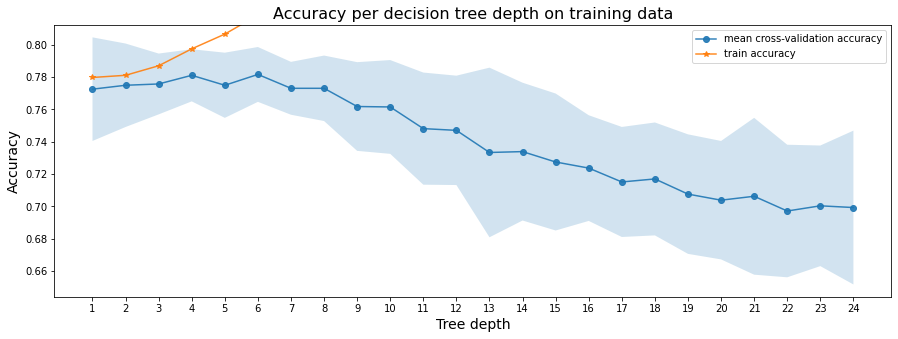

In [ ]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
tree_depths = range(1,25)
cv_scores_mean, cv_scores_std, accuracy_scores = run_cross_validation_on_trees(X_train, y_train, tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(tree_depths, cv_scores_mean, cv_scores_std, accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [ ]:
idx_max = cv_scores_mean.argmax()
best_tree_depth = tree_depths[idx_max]
best_tree_cv_score = cv_scores_mean[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {}'.format(
      best_tree_depth, round(best_tree_cv_score*100,5)))


The depth-6 tree achieves the best mean cross-validation accuracy 78.16563


In [ ]:
# function for training and evaluating a tree
def run(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test,model
  

# train and evaluate the tree with depth 5
best_tree_accuracy_train, best_tree_accuracy_test,model = run(X_train, y_train, X_test, y_test, best_tree_depth)

Single tree depth:  6
Accuracy, Training Set:  81.86695 %
Accuracy, Test Set:  80.7074 %


In [ ]:
import sklearn
y_pred=model.predict(X_test)
print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.89       750
         1.0       0.51      0.30      0.37       183

    accuracy                           0.81       933
   macro avg       0.68      0.61      0.63       933
weighted avg       0.78      0.81      0.79       933



In [ ]:
from sklearn import tree
from graphviz import Source
from sklearn.tree import export_graphviz
import os
from sklearn.tree import plot_tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_9 <= 0.29
|   |--- feature_29 <= 0.02
|   |   |--- feature_41 <= 0.50
|   |   |   |--- feature_4 <= 0.00
|   |   |   |   |--- feature_52 <= 0.50
|   |   |   |   |   |--- feature_25 <= 0.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_25 >  0.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_52 >  0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_4 >  0.00
|   |   |   |   |--- feature_22 <= 0.01
|   |   |   |   |   |--- feature_3 <= 0.26
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_3 >  0.26
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_22 >  0.01
|   |   |   |   |   |--- class: 0.0
|   |   |--- feature_41 >  0.50
|   |   |   |--- feature_52 <= 0.50
|   |   |   |   |--- feature_42 <= 0.50
|   |   |   |   |   |--- feature_0 <= 0.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_0 >  0.00
|   |   |   |   |   |   |--- class: 0.0
|   |  

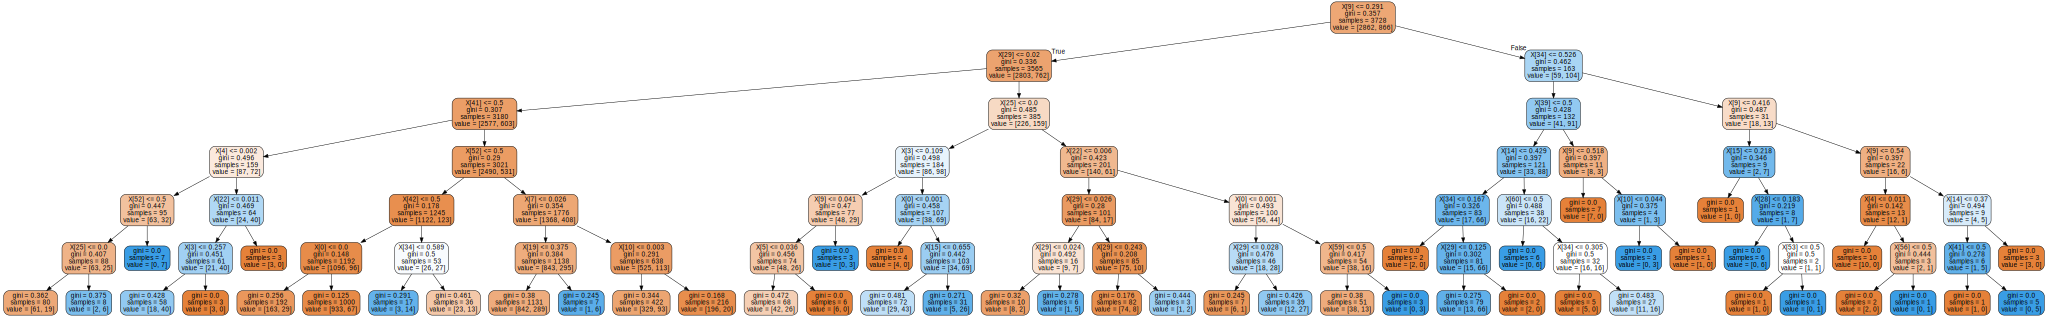

In [ ]:
export_graphviz(
        model,
        out_file=os.path.join("graph.odt"),
        rounded=True,
        max_depth = 7,
        filled=True,
    )
Source.from_file(os.path.join("graph.odt"))

##Using Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_depth=best_tree_depth, min_samples_leaf=50,n_jobs=4)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [ ]:
# Predicting on the splitted test set
y_pred = clf.predict(X_test)

In [ ]:
##Test score
accuracy_rf = round(clf.score(X_test,y_test),2)
print("The accuracy with random forest algorithm is: ",accuracy_rf*100,"%")

The accuracy with random forest algorithm is:  82.0 %


In [ ]:
print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90       750
         1.0       0.63      0.19      0.29       183

    accuracy                           0.82       933
   macro avg       0.73      0.58      0.59       933
weighted avg       0.79      0.82      0.78       933



#Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Predicting on the splitted test set
y_pred = clf.predict(X_test)

In [ ]:
##Test score
accuracy_lr = round(clf.score(X_test,y_test),2)
print("The accuracy with Logistic regression algorithm is: ",accuracy_lr*100,"%")

The accuracy with Logistic regression algorithm is:  82.0 %


In [ ]:
print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90       750
         1.0       0.61      0.19      0.29       183

    accuracy                           0.82       933
   macro avg       0.72      0.58      0.59       933
weighted avg       0.79      0.82      0.78       933



#As the data is imbalanced, we should go for precision and recall as our metrics rather than accuracy. 
#We have less precision and recall for class 1 by all these algorithm due to data imbalnace. 
#Oversampling or SMOTE techniques can be used in order to cope up with this.

#As DecisionTreeClassifier outperforms the other 2 algorithm, drawing Precision-recall curve for it.
#From precision-recall curve I will be determining the threshold for classification.
Generally, the use of ROC curves and precision-recall curves are as follows:  
ROC curves should be used when there are roughly equal numbers of observations for each class.  
Precision-Recall curves should be used when there is a moderate to large class imbalance.  

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score,confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import pandas as pd

#Drawing precision-recall curve because our dataset is highly imbalanced  
#I should use threshold value for classification from precision-recall curve because of data imbalance.  
#But I am calculating thresholds from both roc-auc and precision recall curve and I will be using the optimal threshold from precision-recall curve..

In [ ]:
# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

In [ ]:
# convert to f score
fscore=[]
for i in range(len(precision)):
  if precision[i]!=0 and recall[i]!=0:
    fscore.append((2 * precision[i] * recall[i])/(precision[i] + recall[i]))
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
optimal_threshold=thresholds[ix]

Best Threshold=0.361111, F-Score=0.408


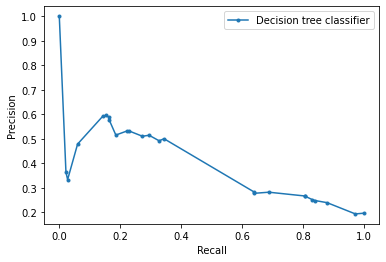

In [ ]:
plt.plot(recall, precision, marker='.', label='Decision tree classifier')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

#ROC-AUC CURVE

In [ ]:
def get_auc_scores(clf, X_train, X_test, y_train, y_test):
  y_train_score = clf.predict_proba(X_train)[:, 1]
  y_test_score = clf.predict_proba(X_test)[:, 1]
  auc_train = roc_auc_score(y_train, y_train_score)
  auc_test = roc_auc_score(y_test, y_test_score)
  print("Training AUC: %0.2f" %(auc_train*100),"%")
  print( "Testing AUC: %0.2f"%(auc_test*100),"%")
  return y_test_score

In [ ]:
y_test_score= get_auc_scores(model, X_train, X_test, y_train, y_test)

Training AUC: 76.29 %
Testing AUC: 68.79 %


In [ ]:
def plot_roc_curve(y_test, y_test_score):
  fpr, tpr, thresholds_roc = roc_curve(y_test, y_test_score)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" %roc_auc)
  plt.plot([0, 1], [0, 1])
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic")
  plt.legend(loc="lower right")
  plt.show()
  return fpr, tpr,thresholds_roc

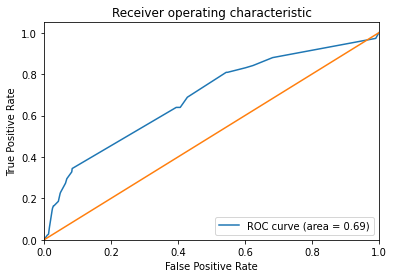

In [ ]:
fpr,tpr,thresholds_roc=plot_roc_curve(y_test, y_test_score)

We can see that the model is penalized for predicting the majority class in all cases.  
The scores show that the model that look good according to the ROC Curve is not performing well using precision and recall. 

#Deciding optimal threshold value from roc-auc curve

#G-mean  
##The geometric mean or known as G-mean is the geometric mean of sensitivity (known as recall) and specificity. So, it will be one of the unbiased evaluation metrics for imbalanced classification.  

In [ ]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))
# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds_roc[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.2375 with G-Mean: 0.6276
FPR: 0.428, TPR: 0.6885


Using the G-mean as the unbiased evaluation metrics.     
Theoretically, the observation will be categorized as a minor class when its probability is greater than threshold (if probabilities of minority class are selected).  

#Using threshold from precison recall curve for classification

In [ ]:
# calculate precision and recall for each threshold
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# # predict class values
yhat=[1 if prob>optimal_threshold else 0 for prob in probs]

In [ ]:
print("Model's accuracy with proper optimal threshold from precision-recall curve is:", round((sklearn.metrics.accuracy_score(y_test, yhat)),2)*100,"%")

Model's accuracy with proper optimal threshold from precision-recall curve is: 80.0 %


In [ ]:
print(sklearn.metrics.classification_report(y_test,yhat))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       750
         1.0       0.49      0.33      0.39       183

    accuracy                           0.80       933
   macro avg       0.67      0.62      0.64       933
weighted avg       0.78      0.80      0.79       933



#Future score:
## More algorithms can be tried out with proper hyperparameter tuning.  
##Regularisation techniques can be carried out.  


#Prediction of test dataset provided with Decision tree classifier model

In [ ]:
test_df2=test_df.copy()

In [ ]:
test_df2.head()

decision_id   v1         v2       v3   v4  \
4661  7a74c817-f036-4214-ade0-e5bfa07fd0fc  0.0  514936.31  1450.40  0.0   
4662  7ba155b6-ce2c-432e-a717-163acd6306da  0.0     445.33  4488.08  0.0   
4663  831a2f46-dbb4-47a9-9f3b-91ff7d0214d2  2.0   10247.17     4.43  0.0   
4664  d4ec4849-b80e-49e9-a8a5-0e17f7d96c02  NaN   91163.98  2498.04  0.0   
4665  e67c5ff3-3751-40d4-b621-4987df98ce1b  0.0   39606.80  6254.56  0.0   

         v5         v6   v7   v8   v9  ...  v50    brand     carrier  \
4661   59.0  150981.97  0.0  0.0  3.0  ...  0.0   xiaomi  IND airtel   
4662   18.0        NaN  0.0  0.0  0.0  ...  0.0   Xiaomi    Vi India   
4663   24.0   17664.16  0.0  0.0  4.0  ...  0.0  samsung      airtel   
4664  119.0   10992.66  1.0  NaN  6.0  ...  0.0  samsung      Airtel   
4665  138.0   62969.22  1.0  0.0  0.0  ...  0.0   HUAWEI      airtel   

            device_name                  gms_version  manufacturer  \
4661    Xiaomi Redmi 6A  20.50.16 (100306-351607135)        Xiaomi   
4662    Xiaomi Redmi 8A  20.39.15 (100306-335085812)        Xiaomi   
4663  Samsung SM-A307FN  20.47.14 (120400-349456378)       samsung   
4664   Samsung SM-J200G  20.50.16 (020304-351607135)       samsung   
4665     HUAWEI RIO-L01  20.47.14 (040408-349456378)        HUAWEI   

      network_type  screen_height  screen_width  screen_dpi  
4661            4G         1344.0         720.0       xhdpi  
4662            4G         1364.0         720.0       xhdpi  
4663     Unknown_0         1423.0         720.0        hdpi  
4664            3G          960.0         540.0        hdpi  
4665            4G         1776.0        1080.0      xxhdpi  

[5 rows x 60 columns]

#Fixing Nan values
##The col_list will be used to drop unwanted columns which was calculated during training process.

In [ ]:
test_df2=test_df2[col_list[1:]]
test_df2['decision_id']=test_df['decision_id']

In [ ]:
test_df2.head()

v2       v3   v4     v5         v6   v7   v8   v9       v10  \
4661  514936.31  1450.40  0.0   59.0  150981.97  0.0  0.0  3.0  720000.0   
4662     445.33  4488.08  0.0   18.0        NaN  0.0  0.0  0.0  330000.0   
4663   10247.17     4.43  0.0   24.0   17664.16  0.0  0.0  4.0       0.0   
4664   91163.98  2498.04  0.0  119.0   10992.66  1.0  NaN  6.0       0.0   
4665   39606.80  6254.56  0.0  138.0   62969.22  1.0  0.0  0.0       0.0   

          v11  ...    brand     carrier        device_name  \
4661  7235.29  ...   xiaomi  IND airtel    Xiaomi Redmi 6A   
4662  7497.47  ...   Xiaomi    Vi India    Xiaomi Redmi 8A   
4663     0.00  ...  samsung      airtel  Samsung SM-A307FN   
4664  2400.00  ...  samsung      Airtel   Samsung SM-J200G   
4665  2790.00  ...   HUAWEI      airtel     HUAWEI RIO-L01   

                      gms_version  manufacturer  network_type  screen_height  \
4661  20.50.16 (100306-351607135)        Xiaomi            4G         1344.0   
4662  20.39.15 (100306-335085812)        Xiaomi            4G         1364.0   
4663  20.47.14 (120400-349456378)       samsung     Unknown_0         1423.0   
4664  20.50.16 (020304-351607135)       samsung            3G          960.0   
4665  20.47.14 (040408-349456378)        HUAWEI            4G         1776.0   

      screen_width  screen_dpi                           decision_id  
4661         720.0       xhdpi  7a74c817-f036-4214-ade0-e5bfa07fd0fc  
4662         720.0       xhdpi  7ba155b6-ce2c-432e-a717-163acd6306da  
4663         720.0        hdpi  831a2f46-dbb4-47a9-9f3b-91ff7d0214d2  
4664         540.0        hdpi  d4ec4849-b80e-49e9-a8a5-0e17f7d96c02  
4665        1080.0      xxhdpi  e67c5ff3-3751-40d4-b621-4987df98ce1b  

[5 rows x 56 columns]

In [ ]:
numerical_features_test = test_df2.select_dtypes(include=[np.number])

#The preprocessing pipeline is reused for test dataset and is used to only perform transform and not fit or else data leakage will happpen.


In [ ]:
res=numeric_pipeline.transform(numerical_features_test)

In [ ]:
numerical_features_test = pd.DataFrame(res,columns=numerical_features_test.columns)

In [ ]:
numerical_features_test.head()

v2        v3   v4        v5        v6        v7        v8        v9  \
0  0.015950  0.000465  0.0  0.074028  0.002945  0.000000  0.050892  0.061224   
1  0.000014  0.001440  0.0  0.022585  0.000128  0.000000  0.050892  0.000000   
2  0.000317  0.000001  0.0  0.030113  0.000345  0.000000  0.050892  0.081633   
3  0.002824  0.000801  0.0  0.149310  0.000214  0.142857  0.050892  0.122449   
4  0.001227  0.002006  0.0  0.173149  0.001228  0.142857  0.050892  0.000000   

        v10       v11  ...       v41  v42       v43       v46  v47       v48  \
0  0.070685  0.008914  ...  0.019942  0.0  0.011789  0.004002  0.0  0.000974   
1  0.037067  0.009237  ...  0.000893  0.0  0.000013  0.004002  0.0  0.000238   
2  0.008620  0.000000  ...  0.000339  0.0  0.000139  0.004002  0.0  0.000393   
3  0.008620  0.002957  ...  0.003002  0.0  0.002087  0.018779  0.0  0.000352   
4  0.008620  0.003437  ...  0.002628  0.0  0.000851  0.004002  0.0  0.001849   

        v49  v50  screen_height  screen_width  
0  0.000000  0.0       0.260000      0.140928  
1  0.000000  0.0       0.268333      0.140928  
2  0.000000  0.0       0.292917      0.140928  
3  0.045714  0.0       0.100000      0.035232  
4  0.000000  0.0       0.440000      0.352319  

[5 rows x 48 columns]

In [ ]:
categorial_features_test = test_df2.select_dtypes(include=[np.object])
categorial_features_test.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


brand            8
carrier         90
device_name      8
gms_version      8
manufacturer     8
network_type     8
screen_dpi       8
decision_id      0
dtype: int64

In [ ]:
categorial_features_test=categorial_features_test.drop('decision_id',axis=1)
res=categorical_pipeline.transform(categorial_features_test)


In [ ]:
categorial_features_test = pd.DataFrame(res,columns=categorial_features_test.columns)
categorial_features_test.isna().sum()

brand           0
carrier         0
device_name     0
gms_version     0
manufacturer    0
network_type    0
screen_dpi      0
dtype: int64

In [ ]:
#Here more grouping can be done but as of now just tried on carrier on few categories.
categorial_features_test['carrier'] = categorial_features_test['carrier'].replace({
                                                             'Vi India':'Vi India',
                                                             'Vodafone IN':'Vi India',
                                                             'airtel':'airtel',
                                                             'IND airtel':'airtel'
                                                             })

In [ ]:
test_df2=pd.concat([numerical_features_test,categorial_features_test],axis=1)
test_df2.head()

v2        v3   v4        v5        v6        v7        v8        v9  \
0  0.015950  0.000465  0.0  0.074028  0.002945  0.000000  0.050892  0.061224   
1  0.000014  0.001440  0.0  0.022585  0.000128  0.000000  0.050892  0.000000   
2  0.000317  0.000001  0.0  0.030113  0.000345  0.000000  0.050892  0.081633   
3  0.002824  0.000801  0.0  0.149310  0.000214  0.142857  0.050892  0.122449   
4  0.001227  0.002006  0.0  0.173149  0.001228  0.142857  0.050892  0.000000   

        v10       v11  ...  v50  screen_height  screen_width    brand  \
0  0.070685  0.008914  ...  0.0       0.260000      0.140928   xiaomi   
1  0.037067  0.009237  ...  0.0       0.268333      0.140928   Xiaomi   
2  0.008620  0.000000  ...  0.0       0.292917      0.140928  samsung   
3  0.008620  0.002957  ...  0.0       0.100000      0.035232  samsung   
4  0.008620  0.003437  ...  0.0       0.440000      0.352319   HUAWEI   

    carrier        device_name                  gms_version  manufacturer  \
0    airtel    Xiaomi Redmi 6A  20.50.16 (100306-351607135)        Xiaomi   
1  Vi India    Xiaomi Redmi 8A  20.39.15 (100306-335085812)        Xiaomi   
2    airtel  Samsung SM-A307FN  20.47.14 (120400-349456378)       samsung   
3    Airtel   Samsung SM-J200G  20.50.16 (020304-351607135)       samsung   
4    airtel     HUAWEI RIO-L01  20.47.14 (040408-349456378)        HUAWEI   

   network_type  screen_dpi  
0            4G       xhdpi  
1            4G       xhdpi  
2     Unknown_0        hdpi  
3            3G        hdpi  
4            4G      xxhdpi  

[5 rows x 55 columns]

In [ ]:
#Droping the same columns we dropped for trainig dataset
test_df2=test_df2.drop(corr_features,axis=1)
test_df2=test_df2.drop(['manufacturer','brand'],axis=1)

In [ ]:
def get_freq_labels(df, var, rare_perc):    
    df = df.copy()
    tmp = df.groupby(var)[var].count() / len(df)
    return tmp[tmp > rare_perc].index


vars_cat = [val for val in test_df2.columns if test_df2[val].dtype=='O']
for var in vars_cat:
    # find the frequent categories
    frequent_cat = get_freq_labels(test_df2, var, 0.02)
    # replace rare categories by the string "Rare"
    test_df2[var] = np.where(test_df2[var].isin(
        frequent_cat ), test_df2[var], 'Rare')

In [ ]:
test_df2.head()

v2        v3   v4        v5        v6        v7        v8        v9  \
0  0.015950  0.000465  0.0  0.074028  0.002945  0.000000  0.050892  0.061224   
1  0.000014  0.001440  0.0  0.022585  0.000128  0.000000  0.050892  0.000000   
2  0.000317  0.000001  0.0  0.030113  0.000345  0.000000  0.050892  0.081633   
3  0.002824  0.000801  0.0  0.149310  0.000214  0.142857  0.050892  0.122449   
4  0.001227  0.002006  0.0  0.173149  0.001228  0.142857  0.050892  0.000000   

        v10       v11  ...  v40       v46  v47       v49  screen_height  \
0  0.070685  0.008914  ...  0.0  0.004002  0.0  0.000000       0.260000   
1  0.037067  0.009237  ...  0.0  0.004002  0.0  0.000000       0.268333   
2  0.008620  0.000000  ...  0.0  0.004002  0.0  0.000000       0.292917   
3  0.008620  0.002957  ...  0.0  0.018779  0.0  0.045714       0.100000   
4  0.008620  0.003437  ...  0.0  0.004002  0.0  0.000000       0.440000   

    carrier  device_name                  gms_version  network_type  \
0    airtel         Rare                         Rare            4G   
1  Vi India         Rare                         Rare            4G   
2    airtel         Rare  20.47.14 (120400-349456378)     Unknown_0   
3    Airtel         Rare                         Rare          Rare   
4    airtel         Rare                         Rare            4G   

   screen_dpi  
0       xhdpi  
1       xhdpi  
2        hdpi  
3        hdpi  
4      xxhdpi  

[5 rows x 40 columns]

#One Hot Coding of categorical variables:

In [ ]:
categorial_features_test = test_df2.select_dtypes(include=[np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
test_df2 = pd.get_dummies(test_df2, columns=categorial_features_test.columns)
test_df2.head(10)

v2        v3        v4        v5        v6        v7        v8  \
0  0.015950  0.000465  0.000000  0.074028  0.002945  0.000000  0.050892   
1  0.000014  0.001440  0.000000  0.022585  0.000128  0.000000  0.050892   
2  0.000317  0.000001  0.000000  0.030113  0.000345  0.000000  0.050892   
3  0.002824  0.000801  0.000000  0.149310  0.000214  0.142857  0.050892   
4  0.001227  0.002006  0.000000  0.173149  0.001228  0.142857  0.050892   
5  0.000614  0.000130  0.142857  0.208281  0.000123  0.000000  0.050892   
6  0.000774  0.001033  0.000000  0.073400  0.000402  0.000000  0.050892   
7  0.001575  0.015509  0.000000  0.033250  0.000801  0.071429  0.050892   
8  0.016962  0.017308  0.000000  0.126725  0.002713  0.000000  0.050892   
9  0.003656  0.004161  0.000000  0.238394  0.001258  0.142857  0.050892   

         v9       v10       v11  ...  gms_version_20.50.16 (120408-351607135)  \
0  0.061224  0.070685  0.008914  ...                                        0   
1  0.000000  0.037067  0.009237  ...                                        0   
2  0.081633  0.008620  0.000000  ...                                        0   
3  0.122449  0.008620  0.002957  ...                                        0   
4  0.000000  0.008620  0.003437  ...                                        0   
5  0.163265  0.073271  0.012712  ...                                        0   
6  0.020408  0.008687  0.010893  ...                                        0   
7  0.030612  0.008793  0.000059  ...                                        0   
8  0.040816  0.008620  0.016473  ...                                        0   
9  0.000000  0.052587  0.020393  ...                                        0   

   gms_version_Rare  network_type_4G  network_type_Rare  \
0                 1                1                  0   
1                 1                1                  0   
2                 0                0                  0   
3                 1                0                  1   
4                 1                1                  0   
5                 1                1                  0   
6                 1                0                  0   
7                 0                1                  0   
8                 0                0                  0   
9                 1                0                  0   

   network_type_Unknown_0  network_type_Wifi  screen_dpi_Rare  \
0                       0                  0                0   
1                       0                  0                0   
2                       1                  0                0   
3                       0                  0                0   
4                       0                  0                0   
5                       0                  0                0   
6                       0                  1                0   
7                       0                  0                0   
8                       1                  0                0   
9                       1                  0                0   

   screen_dpi_hdpi  screen_dpi_xhdpi  screen_dpi_xxhdpi  
0                0                 1                  0  
1                0                 1                  0  
2                1                 0                  0  
3                1                 0                  0  
4                0                 0                  1  
5                0                 1                  0  
6                0                 1                  0  
7                0                 1                  0  
8                0                 0                  1  
9                0                 0                  1  

[10 rows x 64 columns]

In [ ]:
train_df.columns,len(train_df.columns)

(Index(['v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12',
        'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22',
        'v24', 'v25', 'v26', 'v29', 'v32', 'v33', 'v35', 'v36', 'v38', 'v40',
        'v46', 'v47', 'v49', 'screen_height', 'default', 'carrier_Idea',
        'carrier_Jio 4G', 'carrier_Rare', 'carrier_Vi India', 'carrier_airtel',
        'device_name_638b5f4f86dfed5d 943a681d9bc971d', 'device_name_Rare',
        'gms_version_20.36.15 (120408-333172415)',
        'gms_version_20.47.14 (040406-349456378)',
        'gms_version_20.47.14 (120400-349456378)',
        'gms_version_20.47.14 (120408-349456378)',
        'gms_version_20.50.16 (040406-351607135)',
        'gms_version_20.50.16 (100406-351607135)',
        'gms_version_20.50.16 (100408-351607135)',
        'gms_version_20.50.16 (120400-351607135)',
        'gms_version_20.50.16 (120406-351607135)',
        'gms_version_20.50.16 (120408-351607135)', 'gms_version_Rare',
        

In [ ]:
test_df2.columns,len(test_df2.columns)

(Index(['v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12',
        'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22',
        'v24', 'v25', 'v26', 'v29', 'v32', 'v33', 'v35', 'v36', 'v38', 'v40',
        'v46', 'v47', 'v49', 'screen_height', 'carrier_Airtel', 'carrier_Idea',
        'carrier_Jio 4G', 'carrier_Rare', 'carrier_Vi India', 'carrier_airtel',
        'device_name_638b5f4f86dfed5d 943a681d9bc971d', 'device_name_Rare',
        'device_name_Xiaomi Redmi Note 7 Pro',
        'gms_version_20.42.17 (040406-342117392)',
        'gms_version_20.47.14 (040406-349456378)',
        'gms_version_20.47.14 (120400-349456378)',
        'gms_version_20.47.14 (120408-349456378)',
        'gms_version_20.50.16 (040406-351607135)',
        'gms_version_20.50.16 (100400-351607135)',
        'gms_version_20.50.16 (100406-351607135)',
        'gms_version_20.50.16 (100408-351607135)',
        'gms_version_20.50.16 (120400-351607135)',
        'gms_version_20.5

#As shown there is mismatch of few columns, below cells solves it and make final test dataframe

In [ ]:
test_df2=test_df2.drop(['carrier_Airtel','device_name_Xiaomi Redmi Note 7 Pro','gms_version_20.50.16 (100400-351607135)'],axis=1) #Dropping new columns in test dataframe which appeared while preprocessing.
test_df2.rename(columns={'gms_version_20.42.17 (040406-342117392)':'gms_version_20.36.15 (120408-333172415)'}, inplace=True) #Renaming a columnn as of now just to match the dataset columns used for training.

In [ ]:
test_df2.columns,len(test_df2.columns)

(Index(['v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12',
        'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22',
        'v24', 'v25', 'v26', 'v29', 'v32', 'v33', 'v35', 'v36', 'v38', 'v40',
        'v46', 'v47', 'v49', 'screen_height', 'carrier_Idea', 'carrier_Jio 4G',
        'carrier_Rare', 'carrier_Vi India', 'carrier_airtel',
        'device_name_638b5f4f86dfed5d 943a681d9bc971d', 'device_name_Rare',
        'gms_version_20.36.15 (120408-333172415)',
        'gms_version_20.47.14 (040406-349456378)',
        'gms_version_20.47.14 (120400-349456378)',
        'gms_version_20.47.14 (120408-349456378)',
        'gms_version_20.50.16 (040406-351607135)',
        'gms_version_20.50.16 (100406-351607135)',
        'gms_version_20.50.16 (100408-351607135)',
        'gms_version_20.50.16 (120400-351607135)',
        'gms_version_20.50.16 (120406-351607135)',
        'gms_version_20.50.16 (120408-351607135)', 'gms_version_Rare',
        'network_ty

##Creating network_type_Unknown column in test dataframe using network_type_Unknown_0 column by reversing the array so that the test dataframe column can match the train dataset columns.  
##This is temporary fix as of nobut can be solved in a better way.

In [ ]:
test_df2['network_type_Unknown']=test_df2['network_type_Unknown_0'][::-1]

In [ ]:
test_df2.head()

v2        v3   v4        v5        v6        v7        v8        v9  \
0  0.015950  0.000465  0.0  0.074028  0.002945  0.000000  0.050892  0.061224   
1  0.000014  0.001440  0.0  0.022585  0.000128  0.000000  0.050892  0.000000   
2  0.000317  0.000001  0.0  0.030113  0.000345  0.000000  0.050892  0.081633   
3  0.002824  0.000801  0.0  0.149310  0.000214  0.142857  0.050892  0.122449   
4  0.001227  0.002006  0.0  0.173149  0.001228  0.142857  0.050892  0.000000   

        v10       v11  ...  gms_version_Rare  network_type_4G  \
0  0.070685  0.008914  ...                 1                1   
1  0.037067  0.009237  ...                 1                1   
2  0.008620  0.000000  ...                 0                0   
3  0.008620  0.002957  ...                 1                0   
4  0.008620  0.003437  ...                 1                1   

   network_type_Rare  network_type_Unknown_0  network_type_Wifi  \
0                  0                       0                  0   
1                  0                       0                  0   
2                  0                       1                  0   
3                  1                       0                  0   
4                  0                       0                  0   

   screen_dpi_Rare  screen_dpi_hdpi  screen_dpi_xhdpi  screen_dpi_xxhdpi  \
0                0                0                 1                  0   
1                0                0                 1                  0   
2                0                1                 0                  0   
3                0                1                 0                  0   
4                0                0                 0                  1   

   network_type_Unknown  
0                     0  
1                     0  
2                     1  
3                     0  
4                     0  

[5 rows x 62 columns]

#Now the columns in train and test matches and ready for predictions

In [ ]:
# calculate precision and recall for each threshold
probs_test = model.predict_proba(test_df2)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# # predict class values
yhat_test=["Fraud" if prob>optimal_threshold else "Not Fraud" for prob in probs_test]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
results_df=pd.DataFrame({"Decision_id":test_df['decision_id'],"Fraud Prediction Probabilty":probs_test,"Outcome":yhat_test})
results_df

Decision_id  Fraud Prediction Probabilty  \
4661  7a74c817-f036-4214-ade0-e5bfa07fd0fc                     0.220379   
4662  7ba155b6-ce2c-432e-a717-163acd6306da                     0.255526   
4663  831a2f46-dbb4-47a9-9f3b-91ff7d0214d2                     0.151042   
4664  d4ec4849-b80e-49e9-a8a5-0e17f7d96c02                     0.220379   
4665  e67c5ff3-3751-40d4-b621-4987df98ce1b                     0.255526   
4666  ec51d141-20b2-4509-92ac-78343d7fc9cf                     0.220379   
4667  0991fec2-bc6f-4ebc-a80d-0a229f4e01cd                     0.255526   
4668  0a54f013-9847-4c3c-8e9b-9b8722ca0beb                     0.067000   
4669  6bf596a0-e94e-4274-8b5d-216d0a54a877                     0.067000   
4670  7db3edf4-dd14-4eaa-aaf9-78e4f919f73c                     0.255526   
4671  dfb5fd20-2924-4cb6-82cb-399cb09deaf1                     0.067000   
4672  e3f8bbb3-66dd-4656-b293-22d60984546c                     0.255526   
4673  fbd51e45-0d90-43db-8a42-ca940dc49b3b                     0.092593   
4674  0f43da21-be4b-4c46-9fab-6eef77215765                     0.067000   
4675  5706805b-c3f1-476b-ac8e-2684952dc6c5                     0.067000   
4676  5a2fef1e-3860-4016-a847-702cde317ebb                     0.255526   
4677  6bcf8945-4a97-46b3-ac25-c8bb9b1fc26d                     0.067000   
4678  8bfb186d-c75d-46e4-859a-4bed1dcd3089                     0.151042   
4679  94f075b5-ae6a-4441-b429-fa634dbcef0e                     0.255526   
4680  9f349898-58e5-4bd9-9886-e6835d573fe7                     0.255526   
4681  ad251bba-87d8-4d9e-b331-9819b7226925                     0.067000   
4682  d1964550-a4fb-4a17-8a31-27afbc0308b9                     0.067000   
4683  f3e75ec5-4c07-462f-b228-1dc93861a01c                     0.092593   
4684  3b4568c7-10b4-49fd-815a-5ef0c9fd847e                     0.857143   
4685  3fdfd996-e3e4-4539-8b1c-2f5ee9166b5f                     0.092593   
4686  7e9a8251-3396-4a9d-b457-a1ce7afec1da                     0.220379   
4687  95589be8-4f58-4cf6-adf4-92ce24ebdd90                     0.067000   
4688  c08001d0-de3d-446f-9d9a-42046ef4b5df                     0.255526   
4689  c4638646-9ff5-4a52-a989-c09810203fea                     0.255526   
4690  ce60130b-08e2-4dc0-834f-c2a1acfad906                     0.255526   
4691  da9043a9-a2eb-4f83-985d-af5fbb379c22                     0.255526   
4692  2ac33f51-9c36-4fce-9071-62874e376a0d                     0.220379   
4693  3030502f-c1e9-4c06-8d98-8ea74d425545                     0.000000   
4694  403064bc-30f6-48e3-83b6-160c2ef6a7d8                     0.067000   
4695  49944fef-42c2-45f7-b8e9-8caa600476d2                     0.151042   
4696  a7c1b8ea-d5be-45a9-b050-d7ff0c066cf2                     0.255526   
4697  e4116032-8ea4-43bc-a74d-65cfb942b5a7                     0.151042   
4698  e515ea52-d166-4559-a663-933bf55728a1                     0.151042   
4699  e866b218-4055-4167-bc78-6d3d3bc7e659                     0.220379   
4700  fe1e27f3-6014-4f49-bf70-2f2e5624195c                     0.255526   
4701  05bc1c41-8ea1-4d6f-9824-abaef76b9480                     0.255526   
4702  510df2c5-fe13-4c28-9aa6-4e4f0dffd661                     0.255526   
4703  674965fe-a088-48d1-a2b8-5c93f75d0be1                     0.220379   
4704  73f73196-cb87-49f9-90ba-4ffda6f597a3                     1.000000   
4705  9bea5782-1093-48e5-923d-cd0e32d2a194                     1.000000   
4706  fbfe1cf2-6c9e-4ea7-b39a-244616ad008e                     0.067000   
4707  67f6acb4-bd4c-4415-8a40-8e68539eae06                     0.255526   
4708  73f41313-bb0b-4ea4-bc2d-f9d60356c3e1                     0.067000   
4709  c129b26f-dc27-44b9-bfe3-ef7c31a9c832                     0.255526   
4710  c2fb9fb7-dd62-480b-87a5-8c9b435ecc64                     0.220379   
4711  cdd6835a-bbc6-4a2c-9c0f-9dba364d7eff                     0.220379   
4712  cf7d7203-e457-4317-88f0-216807d1292a                     0.255526   
4713  cf820b59-76b4-4cd4-ad6d-889490633ebe              

In [ ]:
results_df['Outcome'].value_counts()#showing the ratio of not fraud vs fraud

Not Fraud    1462
Fraud         123
Name: Outcome, dtype: int64

In [ ]:
results_df.to_csv("Final_test_results.csv")

#Generating pickle file for the model

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('model.pkl','wb'))

#END